# Explore Data 2
## Dimensionality reduction: PCA + Varimax Rotation

In [18]:
#%% Import necessary packages
import numpy as np
import matplotlib
import matplotlib.patches as mpatches
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn import linear_model 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from numpy import eye, asarray, dot, sum, diag
from numpy.linalg import svd


# Set matplotlib parameters for plotting
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['axes.linewidth'] = 1.5
matplotlib.rcParams['xtick.major.size'] = 8
matplotlib.rcParams['xtick.major.width'] = 2
matplotlib.rcParams['ytick.major.size'] = 8
matplotlib.rcParams['ytick.major.width'] = 2
matplotlib.rcParams['figure.dpi'] = 100.

### 1. Explore the Iris dataset

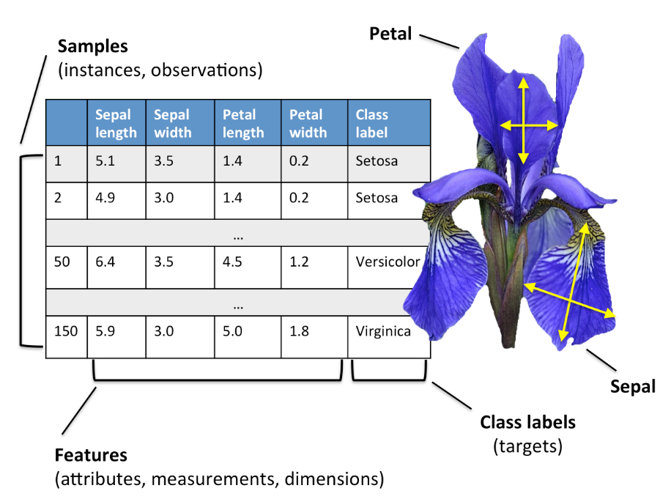

(150, 4)
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


Text(0,0.5,'sepal width (cm)')

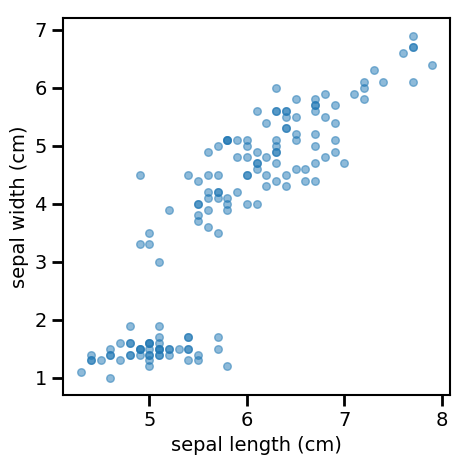

In [19]:
# Load the dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# check dataset sizes
print(X.shape)

# Print out the names of features and targets
print(iris.feature_names)
print(iris.target_names)

# Take only 2 features to make visualization easier
fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(X[:,0], X[:,2], s = 30, alpha = 0.5)
ax.set_xlabel(iris.feature_names[0])
ax.set_ylabel(iris.feature_names[1])

### 2. Standardize the data

In [20]:
# Preprocess the data
# Standardizing
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

### 3. Calculate covariance matrix

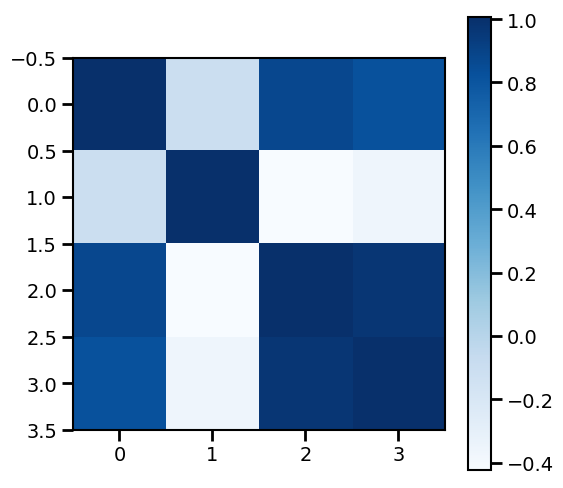

In [21]:
# Calculate covariance matrix
cov_mat = np.cov(X_scaled.T)
fig, ax = plt.subplots(figsize=(6, 6))
im = ax.imshow(cov_mat, cmap='Blues')
fig.colorbar(im)

### 4. Create helper functions for PCA

In [22]:
def plot_scree(percent_explained_var, n_components=None, **kwargs):

    fig = plt.figure(**kwargs)
    ax = fig.add_subplot(111)

    if not n_components:
        n_components = len(percent_explained_var)

    ax.plot(np.array(range(n_components))+1,
            percent_explained_var[:n_components],
            '-o')
    
    ax.set_xlim(1,n_components)
    ax.set_ylim(percent_explained_var.min(),1)
    
    ax.set_xlabel("Number of principal components")
    ax.set_ylabel("Cumulative percent of explained variance")
    ax.grid()

    return fig, ax

### 5. Apply PCA and choose the number of components

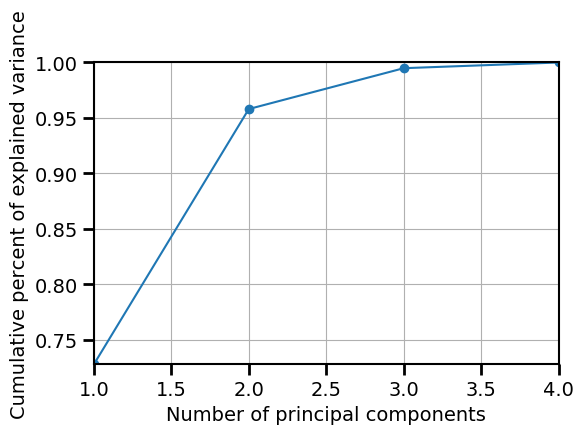

In [23]:
# Apply PCA and calculate explained_variance
pca = PCA()
scores = pca.fit_transform(X_scaled)
percent_explained_var = np.cumsum(pca.explained_variance_ratio_)
# Generate scree plot using the helper function
plot_scree(percent_explained_var)
plt.show()

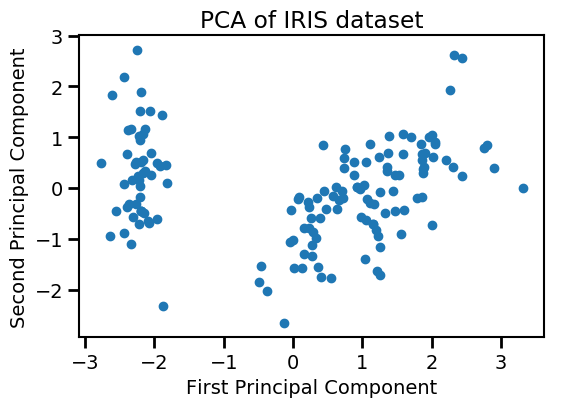

In [24]:
# Apply PCA using 2 principal components which explains 95% variance in the dataset
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

target_names = iris.target_names
# Plot the first and second principal components
plt.figure(figsize=(6, 4))
plt.scatter(X_pca[:,0], X_pca[:, 1])
plt.title('PCA of IRIS dataset')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

plt.show()

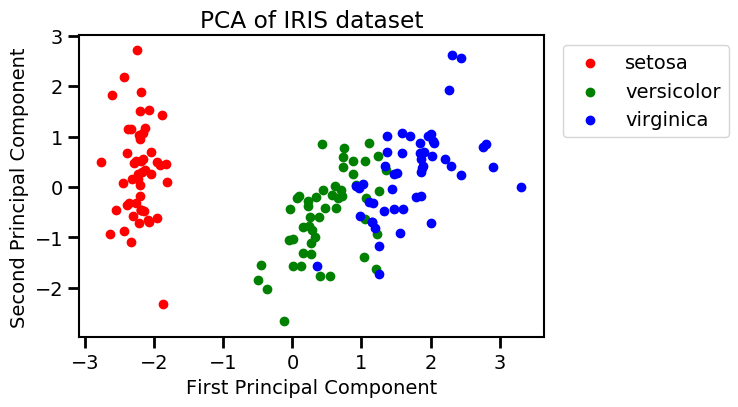

In [25]:
# Apply PCA using 2 principal components which explains 95% variance in the dataset
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

target_names = iris.target_names
# Plot the first and second principal components
plt.figure(figsize=(6, 4))
for c, i, target_name in zip("rgb", [0, 1, 2], target_names):
   plt.scatter(X_pca[y==i,0], X_pca[y==i,1], c=c, label=target_name)

plt.legend(bbox_to_anchor = (1.02, 1),loc= 'upper left')
plt.title('PCA of IRIS dataset')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

plt.show()

### 6. Plot the loadings of features

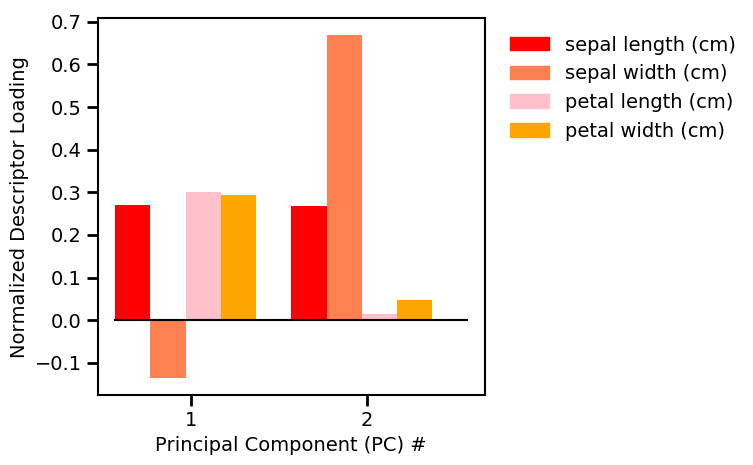

In [26]:
# Plot the normalized descriptor loadings from Yifan
ind = 0
yvals = []
ylabels = []
bar_vals = []
space = 0.2
descriptors= iris.feature_names  # Need to change to your own feature names
n_components = 2  # Depend on your own data

cm = ['r', 'coral', 'pink',  'orange',  'gold', 'y','lightgreen', 'lightblue',  'c', 'mediumpurple', 'brown', 'grey', 'orchid'][:len(descriptors)]
fig = plt.figure(figsize=(5,5))
pc_reg=len(descriptors)

ax = fig.add_subplot(111)
n = len(descriptors)
width = (1-space) / (len(descriptors))
indeces = np.arange(0, pc_reg) + 0.33  

eig_vecs = pca.components_  # eigenvectors

PC_loadings = []

# Create a set of bars at each position
for i, pci in enumerate(eig_vecs[:pc_reg]):
    vals = pci/np.sum(np.absolute(pci))
    PC_loadings.append(vals)
    pos = width*np.arange(n)+i 
    ax.bar(pos, vals, width=width, label=str(i+1), color=cm, alpha = 1) 
        
linex = np.arange(np.arange(0, n_components).min()-0.1 , np.arange(0, n_components).max()+ 1)

ax.set_xticks(indeces) 
ax.set_xticklabels(list(np.arange(0, pc_reg)+1))
ax.set_ylabel("Normalized Descriptor Loading")
ax.set_xlabel("Principal Component (PC) #")

# Add legend using color patches
patches = []
for c in range(n):
    patches.append(mpatches.Patch(color=cm[c]))
plt.legend(patches, descriptors, 
           bbox_to_anchor = (1.02, 1),loc= 'upper left', frameon=False)

plt.plot(linex, linex*0, c = 'k', lw = 1.5)
plt.show()

In [27]:
# Helper fuction for loading plots
def plot_loadings(loadings, axes=None, pc=(0,1), varlabels=[],
                  scale=False, **kwargs):
    xl = loadings[:,pc[0]]
    yl = loadings[:,pc[1]]
    if scale:
        xl = (xl-xl.mean())/(xl.max() - xl.min())
        yl = (yl-yl.mean())/(yl.max() - yl.min())
    
    if axes:
        fig = None
        ax = axes
    else:
        fig = plt.figure(**kwargs)
        ax = fig.add_subplot(111)
    
    for x, y in zip(xl,yl):
        ax.plot([0, x],[0, y])
    
    if list(varlabels):
        for i, txt in enumerate(varlabels):
            ax.annotate(txt, xy=(xl[i], yl[i]), fontsize = 14)
    
    xlim = abs(max(xl.max(),xl.min(),key=abs))*1.1
    ylim = abs(max(yl.max(),yl.min(),key=abs))*1.1
    ax.set_xlim(-xlim,xlim)
    ax.set_ylim(-ylim,ylim)
    
    ax.set_xlabel("PC{}".format(pc[0]+1))
    ax.set_ylabel("PC{}".format(pc[1]+1))
    ax.grid()

    return fig, ax

(<Figure size 500x500 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a7025b6ac8>)

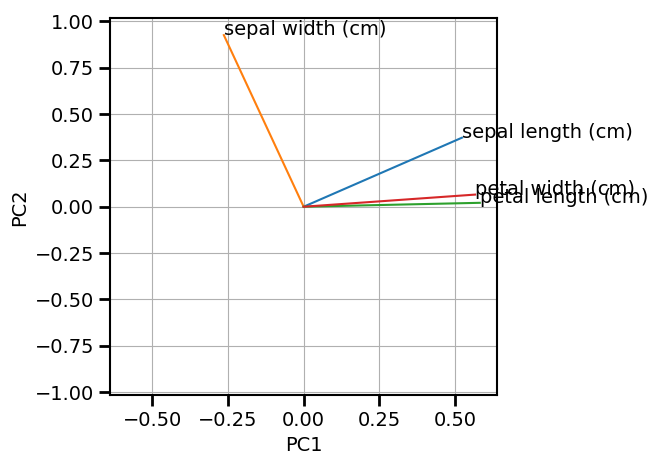

In [28]:
pca = PCA()
scores = pca.fit_transform(X_scaled)
loadings = np.transpose(pca.components_)

plot_loadings(
    loadings=loadings,
    pc=(0,1),
    figsize=(5,5),
    varlabels=iris.feature_names
)

### 7. Reconstruction using the principal components

In [29]:
# Apply PCA using 2 principal components which explains 95% variance in the dataset
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [30]:
# Two different ways to reconstruct
ncomp = 2 # Use the first two components to reconstruct

# Reconstruct using matrix multiplication
Xhat = np.dot(pca.transform(X_scaled)[:,:ncomp], pca.components_[:ncomp,:])
Xhat_recons = scaler.inverse_transform(Xhat)

# Reconstruct directly using sklearn
recons = pca.inverse_transform(X_pca)
X_recons = scaler.inverse_transform(recons)

# Use the first example to show the difference between the original data and reconstructed data
print(X[0,:])
print(X_recons[0,:])
print(Xhat_recons[0,])

[5.1 3.5 1.4 0.2]
[5.02244783 3.51399226 1.46271999 0.24959796]
[5.02244783 3.51399226 1.46271999 0.24959796]


## Varimax rotation

### 8. Create helper functions for varimax rotation

In [31]:
def varimax(Phi, gamma = 1.0, q = 20, tol = 1e-6):
    p,k = Phi.shape
    R = eye(k)
    d=0
    for i in range(q):
        d_old = d
        Lambda = dot(Phi, R)
        u,s,vh = svd(dot(Phi.T,asarray(Lambda)**3 - (gamma/p) * dot(Lambda, diag(diag(dot(Lambda.T,Lambda))))))
        R = dot(u,vh)
        d = sum(s)
        if d_old!=0 and d/d_old < 1 + tol: break
    return dot(Phi, R)

def rotate_factors(Phi,method='varimax',gamma=None,max_iter=100,
                   tol=1e-6):
    """
    Phi : array-like, shape (n_features, n_components)
        Input array of unrotated factors.
    
    max_iter : int, optional (default 100)
        Maximum number of iterations to perform.
        
    tol : float, optional (default 1e-6)
        Tolerance for rotations.
        
    Returns
    -------
    Phi_new : array-like, shape (n_features, n_components)
    
    """
    if gamma == None:
        if (method == 'varimax'):
            gamma = 1.0
        elif (method == 'quartimax'):
            gamma = 0.0
          
    p, k = Phi.shape
    R = np.eye(k)
    var = 0
            
    for i in range(max_iter):
        var_old = var
        Lambda = np.dot(Phi, R)
        
        tmp = np.diag(np.diag(np.dot(Lambda.T,Lambda)))
        u,s,vh = np.linalg.svd(
            np.dot(
                Phi.T,
                np.asarray(Lambda) ** 3 - np.dot(Lambda,tmp) / p * gamma
            )
        )
        R = np.dot(u,vh)
        var = np.sum(s)
            
        if var_old!=0 and var/var_old < 1 + tol:
            break
            
    return np.dot(Phi, R)

### 9. Perform varimax rotation and show the results

(<Figure size 500x500 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a702d13438>)

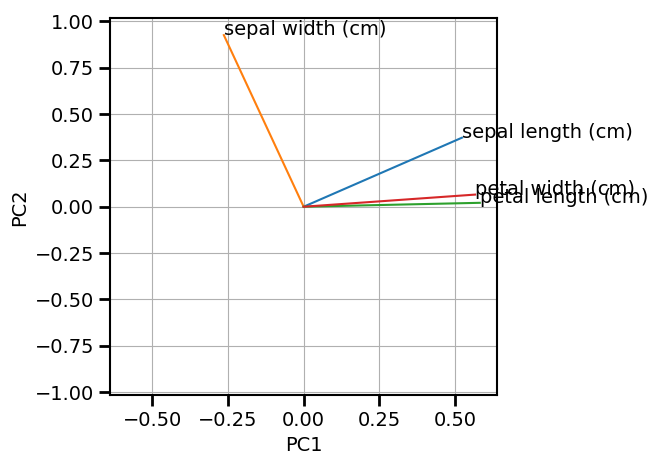

In [32]:
pca = PCA()
scores = pca.fit_transform(X_scaled)
loadings = np.transpose(pca.components_)

plot_loadings(
    loadings=loadings,
    pc=(0,1),
    figsize=(5,5),
    varlabels=iris.feature_names
)

(<Figure size 500x500 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a702eb6390>)

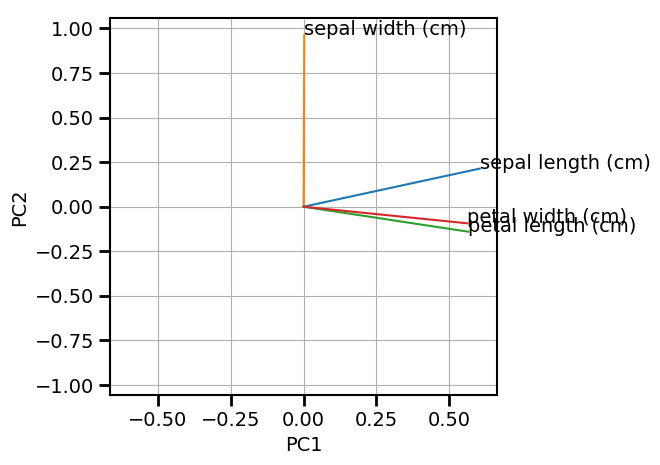

In [33]:
pca = PCA()
scores = pca.fit_transform(X_scaled)
loadings = np.transpose(pca.components_)


loadings_rotated = rotate_factors(loadings[:,:2],method='varimax')
scores_rotated = np.matmul(X_scaled,loadings_rotated)

plot_loadings(
    loadings=loadings_rotated,
    pc=(0,1),
    figsize=(5,5),
    varlabels=iris.feature_names
)